In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
#%config InlineBackend.figure_format = 'retina' # Uncomment if using a retina display
plt.rc('pdf', fonttype=42)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
#plt.rcParams['text.usetex'] = True # Uncomment if LaTeX installed to render plots in LaTeX
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['font.family'] = 'serif'

In [2]:
df = pd.read_csv('../output/model_params_and_results.csv')

In [3]:
df['score'] = abs(df['mean_test_score'])
df['num_hidden_layers'] = df['param_num_hidden_layers']
df['hidden_layer_size'] = df['param_hidden_layer_size']
df['activation_function'] = df['param_activation_function']

In [4]:
df.head()

,param_num_hidden_layers,param_hidden_layer_size,param_activation_function,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,...,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,score,num_hidden_layers,hidden_layer_size,activation_function
0,0,0,linear,18.877625,1.608140,0.138699,0.025194,-2.373923,-2.081822,-1.334480,...,-1.837597,-1.176133,-3.024336,-1.095315,-1.887882,0.721616,2.044422,0,0,linear
1,0,0,relu,13.943288,0.287599,0.295754,0.018892,-7.876654,-8.002765,-7.793879,...,-7.970431,-8.022614,-7.943718,-7.945698,-7.976898,0.031105,7.976894,0,0,relu
2,0,0,sigmoid,12.494315,0.124183,0.203067,0.020734,-3.334007,-3.429019,-3.289454,...,-3.403003,-3.437868,-3.386606,-3.386745,-3.408206,0.020881,3.408203,0,0,sigmoid
3,0,0,tanh,12.805012,0.312548,0.343594,0.019401,-3.334007,-3.429019,-3.289454,...,-3.403003,-3.437868,-3.386606,-3.386745,-3.408206,0.020881,3.408203,0,0,tanh
4,1,64,linear,245.377212,47.310742,0.487355,0.024138,-0.179391,-0.311087,-0.196488,...,-0.124082,-0.039679,-0.014129,-0.048821,-0.050033,0.038955,0.222170,1,64,linear


# Plotting the results in a more interpretable fashion

# Number of hidden layers

/opt/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


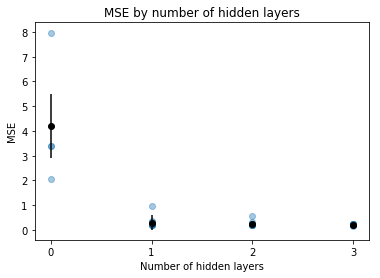

In [5]:
x = [0, 1, 2, 3]
y = [df.query('num_hidden_layers == 0')['score'].mean(), 
    df.query('num_hidden_layers == 1')['score'].mean(),
                      df.query('num_hidden_layers == 2')['score'].mean(),
                      df.query('num_hidden_layers == 3')['score'].mean()]
e = [df.query('num_hidden_layers == 0')['score'].sem(),
     df.query('num_hidden_layers == 1')['score'].mean(),
                      df.query('num_hidden_layers == 2')['score'].sem(),
                      df.query('num_hidden_layers == 3')['score'].sem()]
plt.scatter(df['num_hidden_layers'], df['score'], alpha=0.4)
plt.xticks([0,1,2,3])
plt.xlabel("Number of hidden layers")
plt.ylabel("MSE")
plt.title('MSE by number of hidden layers')
plt.errorbar(x, y, yerr=e, fmt='o', color='black')
plt.show()

Some of these results are skewed due to outlier values with high MSE scores. Removing all values with MSE > 1 for a clearer picture of the results.

In [6]:
df_ = df[df['score'] <= 1.0]

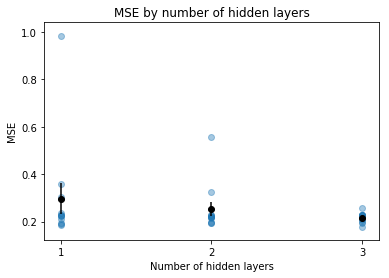

In [7]:
x = [1, 2, 3]
y = [df_.query('num_hidden_layers == 1')['score'].mean(),
                      df_.query('num_hidden_layers == 2')['score'].mean(),
                      df_.query('num_hidden_layers == 3')['score'].mean()]
e = [df_.query('num_hidden_layers == 1')['score'].sem(),
                      df_.query('num_hidden_layers == 2')['score'].sem(),
                      df_.query('num_hidden_layers == 3')['score'].sem()]
plt.scatter(df_['num_hidden_layers'], df_['score'], alpha=0.4)
plt.xticks([1,2,3])
plt.xlabel("Number of hidden layers")
plt.ylabel("MSE")
plt.title('MSE by number of hidden layers')
plt.errorbar(x, y, yerr=e, fmt='o', color='black')
plt.show()

# Hidden layer size

Without removing MSE > 1

In [8]:
hidden_layer_size_map = {0:0, 64:1, 128: 2, 256: 3}
df['hidden_layer_size_numeric'] = [hidden_layer_size_map[x] for x in list(df['hidden_layer_size'])]

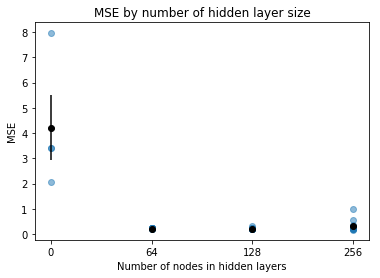

In [9]:
#fig, ax = plt.subplots()
# zero is again omitted
x = [0, 1, 2, 3]
y = [df.query('hidden_layer_size == 0')['score'].mean(),
     df.query('hidden_layer_size == 64')['score'].mean(),
            df.query('hidden_layer_size == 128')['score'].mean(),
            df.query('hidden_layer_size == 256')['score'].mean()]
e = [df.query('hidden_layer_size == 0')['score'].sem(),
    df.query('hidden_layer_size == 64')['score'].sem(),
            df.query('hidden_layer_size == 128')['score'].sem(),
            df.query('hidden_layer_size == 256')['score'].sem()]
plt.scatter(df['hidden_layer_size_numeric'], df['score'], alpha=0.5)
plt.xticks( range(4), ('0','64','128', '256'))
plt.xlabel("Number of nodes in hidden layers")
plt.ylabel("MSE")
plt.title("MSE by number of hidden layer size")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')
plt.show()

In [10]:
hidden_layer_size_map = {64:0, 128: 1, 256: 2}
df_['hidden_layer_size_numeric'] = [hidden_layer_size_map[x] for x in list(df_['hidden_layer_size'])]

/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


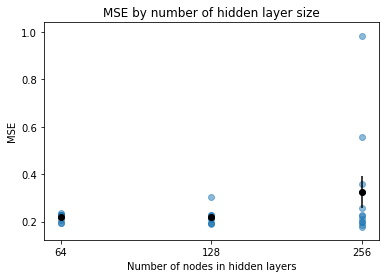

In [11]:
#fig, ax = plt.subplots()
# zero is again omitted
x = [0, 1, 2]
y = [df_.query('hidden_layer_size == 64')['score'].mean(),
            df_.query('hidden_layer_size == 128')['score'].mean(),
            df_.query('hidden_layer_size == 256')['score'].mean()]
e = [df_.query('hidden_layer_size == 64')['score'].sem(),
            df_.query('hidden_layer_size == 128')['score'].sem(),
            df_.query('hidden_layer_size == 256')['score'].sem()]
plt.scatter(df_['hidden_layer_size_numeric'], df_['score'], alpha=0.5)
plt.xticks( range(3), ('64','128', '256'))
plt.xlabel("Number of nodes in hidden layers")
plt.ylabel("MSE")
plt.title("MSE by number of hidden layer size")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')
plt.show()

# Activation function

In [12]:
activation_function_map = {'linear':0, 'sigmoid': 1, 'tanh': 2, 'relu': 3}
df['activation_function_numeric'] = [activation_function_map[x] for x in list(df['activation_function'])]
df_['activation_function_numeric'] = [activation_function_map[x] for x in list(df_['activation_function'])]

/opt/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


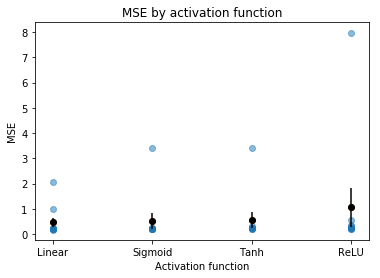

In [13]:
x = [0, 1, 2, 3]
y = [df.query('activation_function == "linear"')['score'].mean(),
            df.query('activation_function == "sigmoid"')['score'].mean(),
            df.query('activation_function == "tanh"')['score'].mean(),
            df.query('activation_function == "relu"')['score'].mean()]
e = [df.query('activation_function == "linear"')['score'].sem(),
            df.query('activation_function == "sigmoid"')['score'].sem(),
            df.query('activation_function == "tanh"')['score'].sem(),
            df.query('activation_function == "relu"')['score'].sem()]

plt.scatter(df['activation_function_numeric'], df['score'], alpha=0.5)
plt.scatter(pd.DataFrame([0,1,2,3]), 
            [df.query('activation_function == "linear"')['score'].mean(),
            df.query('activation_function == "sigmoid"')['score'].mean(),
            df.query('activation_function == "tanh"')['score'].mean(),
            df.query('activation_function == "relu"')['score'].mean()])
plt.xticks( range(4), ('Linear','Sigmoid', 'Tanh', 'ReLU',''))
plt.xlabel("Number of nodes in hidden layers")
plt.xlabel("Activation function")
plt.ylabel("MSE")
plt.title("MSE by activation function")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')
plt.show()

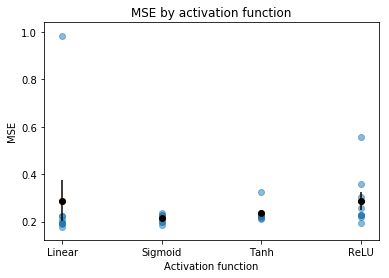

In [14]:
#fig, ax = plt.subplots()
# zero is again omitted
#fig, ax = plt.subplots()
# zero is again omitted
x = [0, 1, 2, 3]
y = [df_.query('activation_function == "linear"')['score'].mean(),
            df_.query('activation_function == "sigmoid"')['score'].mean(),
            df_.query('activation_function == "tanh"')['score'].mean(),
            df_.query('activation_function == "relu"')['score'].mean()]
e = [df_.query('activation_function == "linear"')['score'].sem(),
            df_.query('activation_function == "sigmoid"')['score'].sem(),
            df_.query('activation_function == "tanh"')['score'].sem(),
            df_.query('activation_function == "relu"')['score'].sem()]

plt.scatter(df_['activation_function_numeric'], df_['score'], alpha=0.5)
plt.scatter(pd.DataFrame([0,1,2,3]), 
            [df_.query('activation_function == "linear"')['score'].mean(),
            df_.query('activation_function == "sigmoid"')['score'].mean(),
            df_.query('activation_function == "tanh"')['score'].mean(),
            df_.query('activation_function == "relu"')['score'].mean()])
plt.xticks( range(4), ('Linear','Sigmoid', 'Tanh', 'ReLU',''))
plt.xlabel("Number of nodes in hidden layers")
plt.xlabel("Activation function")
plt.ylabel("MSE")
plt.title("MSE by activation function")
plt.errorbar(x, y, yerr=e, fmt='o', color='black')
plt.show()

Overall we see much narrower error bars for the sigmoid and tanh activations, suggesting that they tend to perform much more consistently. 